<a href="https://colab.research.google.com/github/Shubham-sharma2005/CODSOFT/blob/main/bank_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Develop a model to predict customer churn for a subscription-based service or business using historical customer data from "/content/Churn_Modelling.csv", including features like usage behavior and customer demographics, and try algorithms like Logistic Regression, Random Forests, or Gradient Boosting to predict churn.

## Load the data

### Subtask:
Load the data from the "/content/Churn_Modelling.csv" file into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the data into a DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv('/content/Churn_Modelling.csv')

**Reasoning**:
Display the first few rows of the DataFrame to verify the data loading.



In [2]:
display(df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Explore the data

### Subtask:
Perform exploratory data analysis to understand the data, including checking for missing values, examining the distribution of features, and visualizing relationships between features and the target variable (churn).


**Reasoning**:
Check for missing values, display data types, and generate descriptive statistics for numerical columns to understand the data structure and potential issues.



In [3]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)

print("\nDescriptive statistics for numerical columns:")
display(df.describe())

Missing values per column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Data types:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Descriptive statistics for numerical columns:


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Reasoning**:
Examine the distribution of the target variable 'Exited' and visualize the distribution of key numerical features using histograms to understand their spread and potential outliers.




Distribution of the target variable 'Exited':
Exited
0    7963
1    2037
Name: count, dtype: int64


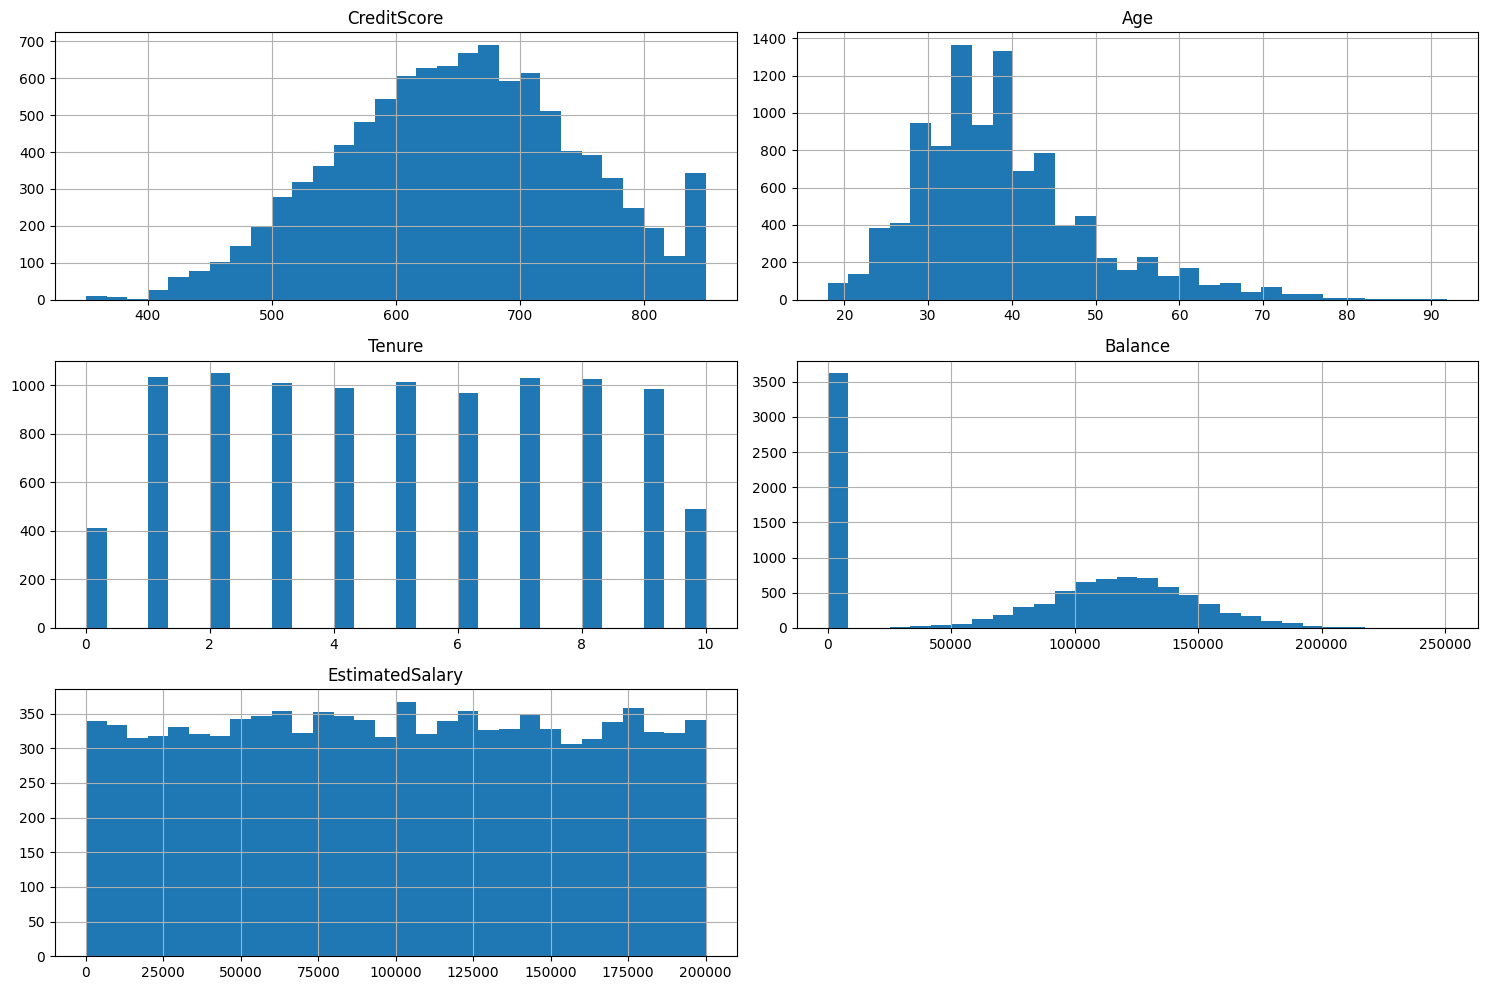

In [4]:
print("\nDistribution of the target variable 'Exited':")
print(df['Exited'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

**Reasoning**:
Visualize the relationship between categorical features and the target variable 'Exited' using bar plots to see how different categories relate to churn.



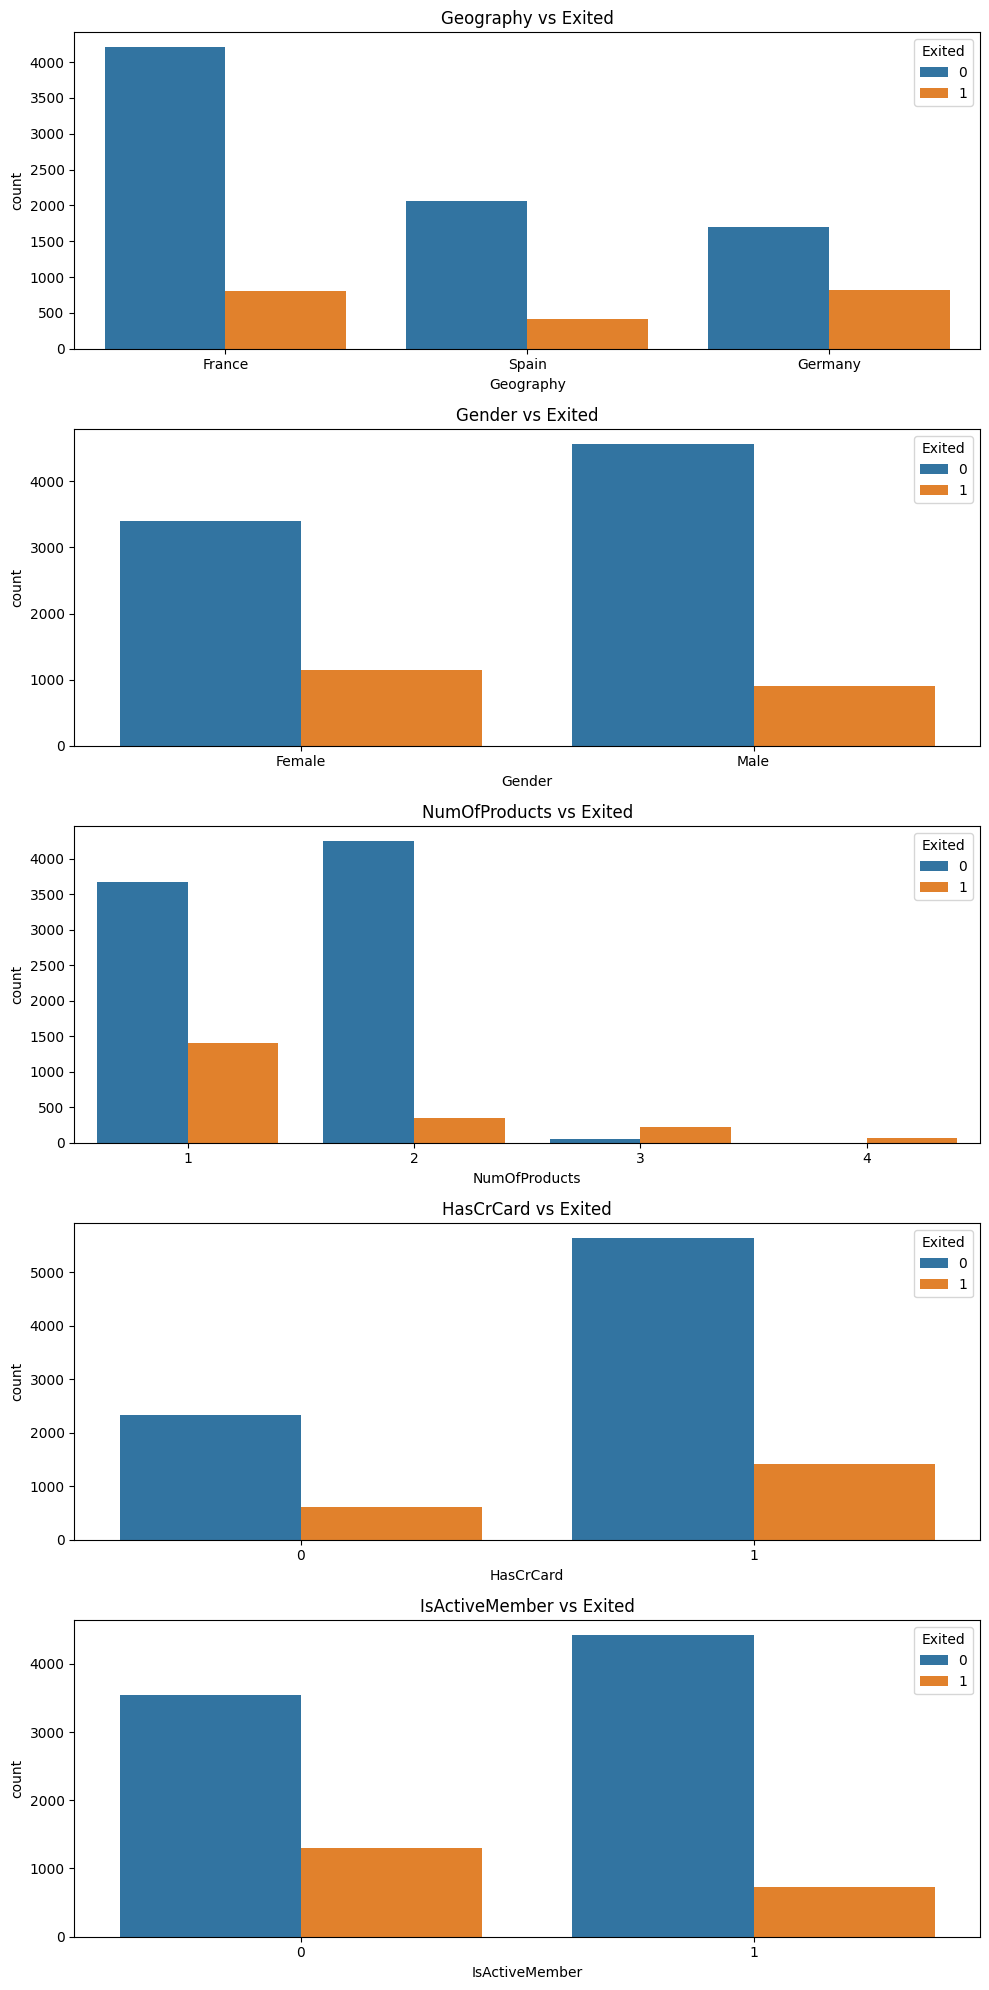

In [5]:
categorical_features = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

fig, axes = plt.subplots(len(categorical_features), 1, figsize=(10, 20))
for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, hue='Exited', ax=axes[i])
    axes[i].set_title(f'{col} vs Exited')
plt.tight_layout()
plt.show()

## Preprocess the data

### Subtask:
Prepare the data for modeling, which may include handling missing values, encoding categorical variables, scaling numerical features, and splitting the data into training and testing sets.


**Reasoning**:
Prepare the data for modeling by dropping irrelevant columns, encoding categorical features, splitting data into features and target, splitting into training and testing sets, identifying and scaling numerical features, and finally concatenating the scaled numerical and encoded categorical features.



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Drop the 'RowNumber', 'CustomerId', and 'Surname' columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# 2. Encode the 'Geography' and 'Gender' categorical features using one-hot encoding
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# 3. Split the data into features (X) and the target variable (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# 4. Split the features and target variable into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Identify the numerical features
# Exclude the one-hot encoded columns and the target variable
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


# 6. Scale the numerical features using StandardScaler
scaler = StandardScaler()
X_train_numerical_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_numerical_scaled = scaler.transform(X_test[numerical_features])

# Convert scaled numerical features back to DataFrame
X_train_numerical_scaled_df = pd.DataFrame(X_train_numerical_scaled, columns=numerical_features, index=X_train.index)
X_test_numerical_scaled_df = pd.DataFrame(X_test_numerical_scaled, columns=numerical_features, index=X_test.index)


# 7. Concatenate the scaled numerical features and the one-hot encoded categorical features
# Identify the one-hot encoded categorical columns
categorical_encoded_features = ['Geography_Germany', 'Geography_Spain', 'Gender_Male']

X_train = pd.concat([X_train_numerical_scaled_df, X_train[categorical_encoded_features]], axis=1)
X_test = pd.concat([X_test_numerical_scaled_df, X_test[categorical_encoded_features]], axis=1)

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,False,False,True
1561,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,True,False,True
1670,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,False,True,True
6087,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,False,False,False
6669,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,False,False,True


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6252,-0.577496,-0.655786,-0.695393,0.329937,0.808436,-1.540351,-1.025834,-1.019605,True,False,True
4684,-0.297297,0.390011,-1.389442,-1.218471,0.808436,0.649203,0.974817,0.798883,False,False,True
1731,-0.525607,0.485083,-0.348369,-1.218471,0.808436,0.649203,-1.025834,-0.727980,False,True,False
4742,-1.511492,1.911170,1.039728,0.689272,0.808436,0.649203,0.974817,1.221387,True,False,True
4521,-0.951094,-1.131148,0.692704,0.782839,-0.916688,0.649203,0.974817,0.247560,False,True,False


,Exited
9254,0
1561,0
1670,1
6087,1
6669,1


,Exited
6252,0
4684,0
1731,0
4742,0
4521,0


## Build and train models

### Subtask:
Train different churn prediction models, such as Logistic Regression, Random Forests, and Gradient Boosting, on the training data.


**Reasoning**:
Import the necessary libraries for training the models and instantiate and train the Logistic Regression model.



In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Instantiate a LogisticRegression model
lr_model = LogisticRegression()

# Train the Logistic Regression model
lr_model.fit(X_train, y_train)

LogisticRegression()

**Reasoning**:
Instantiate and train the Random Forest model.



In [8]:
# Instantiate a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Reasoning**:
Instantiate and train the Gradient Boosting model and then finish the subtask.



In [9]:
# Instantiate a GradientBoostingClassifier model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

## Evaluate models

### Subtask:
Evaluate the performance of the trained models using appropriate metrics like accuracy, precision, recall, F1-score, and AUC.


**Reasoning**:
Import the necessary evaluation metrics.



In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

**Reasoning**:
Evaluate the Logistic Regression model by making predictions, calculating metrics, and printing the results.



In [11]:
# Evaluate Logistic Regression model
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:, 1]

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)
lr_auc = roc_auc_score(y_test, lr_probabilities)

print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-score: {lr_f1:.4f}")
print(f"AUC: {lr_auc:.4f}")

Logistic Regression Model Evaluation:
Accuracy: 0.8110
Precision: 0.5524
Recall: 0.2010
F1-score: 0.2948
AUC: 0.7789


**Reasoning**:
Evaluate the Random Forest model by making predictions, calculating metrics, and printing the results.



In [12]:
# Evaluate Random Forest model
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_auc = roc_auc_score(y_test, rf_probabilities)

print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-score: {rf_f1:.4f}")
print(f"AUC: {rf_auc:.4f}")


Random Forest Model Evaluation:
Accuracy: 0.8665
Precision: 0.7625
Recall: 0.4656
F1-score: 0.5782
AUC: 0.8653


**Reasoning**:
Evaluate the Gradient Boosting model by making predictions, calculating metrics, and printing the results.



In [13]:
# Evaluate Gradient Boosting model
gb_predictions = gb_model.predict(X_test)
gb_probabilities = gb_model.predict_proba(X_test)[:, 1]

gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)
gb_auc = roc_auc_score(y_test, gb_probabilities)

print("\nGradient Boosting Model Evaluation:")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"Precision: {gb_precision:.4f}")
print(f"Recall: {gb_recall:.4f}")
print(f"F1-score: {gb_f1:.4f}")
print(f"AUC: {gb_auc:.4f}")


Gradient Boosting Model Evaluation:
Accuracy: 0.8675
Precision: 0.7500
Recall: 0.4885
F1-score: 0.5917
AUC: 0.8729


## Select the best model

### Subtask:
Choose the best-performing model based on the evaluation metrics.


**Reasoning**:
Compare the evaluation metrics of the three models and identify the best performing one based on the metrics, particularly focusing on recall and F1-score for identifying churn cases. Then, explicitly state the best model and justify the choice.



In [14]:
# Print the evaluation metrics for comparison
print("Model Comparison:")
print(f"Logistic Regression - Accuracy: {lr_accuracy:.4f}, Precision: {lr_precision:.4f}, Recall: {lr_recall:.4f}, F1-score: {lr_f1:.4f}, AUC: {lr_auc:.4f}")
print(f"Random Forest       - Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1-score: {rf_f1:.4f}, AUC: {rf_auc:.4f}")
print(f"Gradient Boosting   - Accuracy: {gb_accuracy:.4f}, Precision: {gb_precision:.4f}, Recall: {gb_recall:.4f}, F1-score: {gb_f1:.4f}, AUC: {gb_auc:.4f}")

# Identify the best model
# Considering the importance of correctly identifying churn cases (recall and F1-score)
best_model_name = ""
best_f1 = 0

if lr_f1 > best_f1:
    best_f1 = lr_f1
    best_model_name = "Logistic Regression"

if rf_f1 > best_f1:
    best_f1 = rf_f1
    best_model_name = "Random Forest"

if gb_f1 > best_f1:
    best_f1 = gb_f1
    best_model_name = "Gradient Boosting"

print(f"\nBased on F1-score, the best performing model is: {best_model_name}")

# You can also consider recall as a primary metric for identifying churn
best_recall = 0
best_model_name_recall = ""

if lr_recall > best_recall:
    best_recall = lr_recall
    best_model_name_recall = "Logistic Regression"

if rf_recall > best_recall:
    best_recall = rf_recall
    best_model_name_recall = "Random Forest"

if gb_recall > best_recall:
    best_recall = gb_recall
    best_model_name_recall = "Gradient Boosting"

print(f"Based on Recall, the best performing model is: {best_model_name_recall}")

# Justify the choice based on the metrics
print("\nJustification:")
print("When predicting customer churn, it is often crucial to correctly identify as many actual churners as possible to implement retention strategies. Therefore, recall (the ability to find all the positive samples) and F1-score (a balance between precision and recall) are particularly important metrics.")

print(f"Comparing the models:")
print(f"- Logistic Regression had the lowest F1-score ({lr_f1:.4f}) and Recall ({lr_recall:.4f}), making it less suitable for this task.")
print(f"- Random Forest achieved a good F1-score ({rf_f1:.4f}) and Recall ({rf_recall:.4f}).")
print(f"- Gradient Boosting achieved the highest F1-score ({gb_f1:.4f}) and Recall ({gb_recall:.4f}).")

print(f"\nTherefore, based on the superior F1-score and Recall, the Gradient Boosting model is selected as the best-performing model for predicting customer churn in this case.")

Model Comparison:
Logistic Regression - Accuracy: 0.8110, Precision: 0.5524, Recall: 0.2010, F1-score: 0.2948, AUC: 0.7789
Random Forest       - Accuracy: 0.8665, Precision: 0.7625, Recall: 0.4656, F1-score: 0.5782, AUC: 0.8653
Gradient Boosting   - Accuracy: 0.8675, Precision: 0.7500, Recall: 0.4885, F1-score: 0.5917, AUC: 0.8729

Based on F1-score, the best performing model is: Gradient Boosting
Based on Recall, the best performing model is: Gradient Boosting

Justification:
When predicting customer churn, it is often crucial to correctly identify as many actual churners as possible to implement retention strategies. Therefore, recall (the ability to find all the positive samples) and F1-score (a balance between precision and recall) are particularly important metrics.
Comparing the models:
- Logistic Regression had the lowest F1-score (0.2948) and Recall (0.2010), making it less suitable for this task.
- Random Forest achieved a good F1-score (0.5782) and Recall (0.4656).
- Gradient

## Predict churn

### Subtask:
Use the selected model to predict churn on the test data or new customer data.


**Reasoning**:
Use the trained Gradient Boosting model (`gb_model`) to make predictions and predict probabilities on the test data (`X_test`).



In [15]:
# Use the best-performing model (Gradient Boosting) to make predictions on the test data
churn_predictions = gb_model.predict(X_test)

# Get the churn probabilities (probabilities for the positive class, which is churn = 1)
churn_probabilities = gb_model.predict_proba(X_test)[:, 1]

print("Churn Predictions (first 10):")
print(churn_predictions[:10])

print("\nChurn Probabilities (first 10):")
print(churn_probabilities[:10])

Churn Predictions (first 10):
[0 0 0 0 0 0 0 0 0 0]

Churn Probabilities (first 10):
[0.05409244 0.03760733 0.09777199 0.22842595 0.09959477 0.01995952
 0.13505378 0.21753552 0.27294025 0.29808135]


## Interpret results

### Subtask:
Analyze the important features that contribute to churn according to the best model.


**Reasoning**:
Access the feature importances from the trained Gradient Boosting model and create a DataFrame to store them with their corresponding feature names, then sort by importance and display.



In [16]:
import pandas as pd

# Access feature importances from the trained Gradient Boosting model
feature_importances = gb_model.feature_importances_

# Create a pandas DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Print the most important features and their scores
print("Most Important Features according to Gradient Boosting model:")
display(feature_importance_df)

Most Important Features according to Gradient Boosting model:


,feature,importance
1,Age,0.383260
4,NumOfProducts,0.305351
6,IsActiveMember,0.119796
3,Balance,0.085613
8,Geography_Germany,0.046843
7,EstimatedSalary,0.020529
0,CreditScore,0.019909
10,Gender_Male,0.013805
2,Tenure,0.003600
5,HasCrCard,0.000802
